Nama : Arya Dwi Saputra || NIM : A11.2022.14390

tahap 1. EDA

In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Step 2: Load dataset
from google.colab import files
uploaded = files.upload()

Saving ObesityDataSet.csv to ObesityDataSet.csv


In [4]:
df = pd.read_csv('ObesityDataSet.csv')

In [5]:
# Step 3: Tampilkan info dasar
print("Beberapa baris pertama:")
display(df.head())

Beberapa baris pertama:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
print("\nInformasi DataFrame:")
df.info()


Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                       

In [7]:
print("\nDeskripsi Statistik:")
display(df.describe(include='all'))


Deskripsi Statistik:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [8]:
# Step 4: Ubah tipe data numerik
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
# Step 5: Cek missing values
print("\nMissing Values per Kolom:")
print(df.isnull().sum())


Missing Values per Kolom:
Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [10]:
# Step 6: Cek duplikasi
print("\nJumlah Data Duplikat:", df.duplicated().sum())


Jumlah Data Duplikat: 18


In [11]:
# Step 7: Cek nilai unik per kolom
print("\nJumlah Nilai Unik per Kolom:")
print(df.nunique())


Jumlah Nilai Unik per Kolom:
Age                               1393
Gender                               3
Height                            1561
Weight                            1517
CALC                                 5
FAVC                                 3
FCVC                               807
NCP                                636
SCC                                  3
SMOKE                                3
CH2O                              1262
family_history_with_overweight       3
FAF                               1185
TUE                               1129
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64


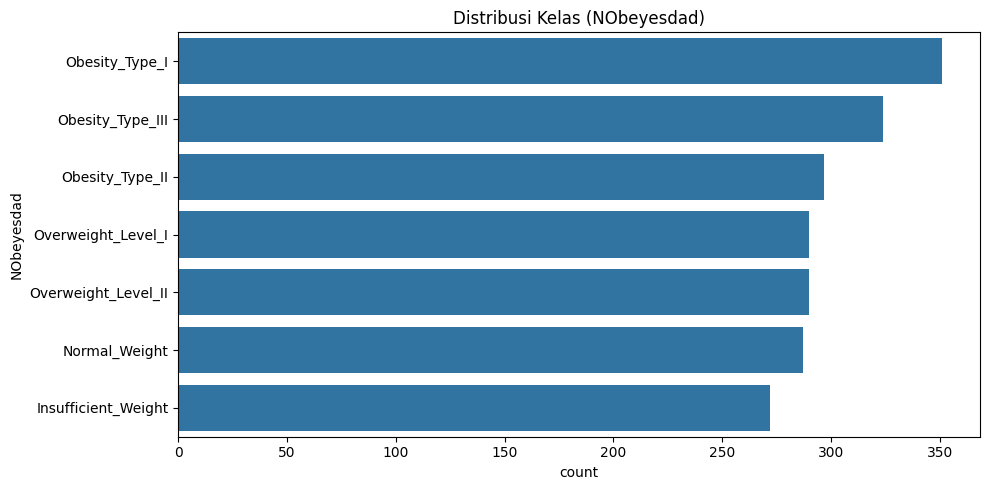

In [12]:
# Step 8: Visualisasi distribusi label (imbalance)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title('Distribusi Kelas (NObeyesdad)')
plt.tight_layout()
plt.show()

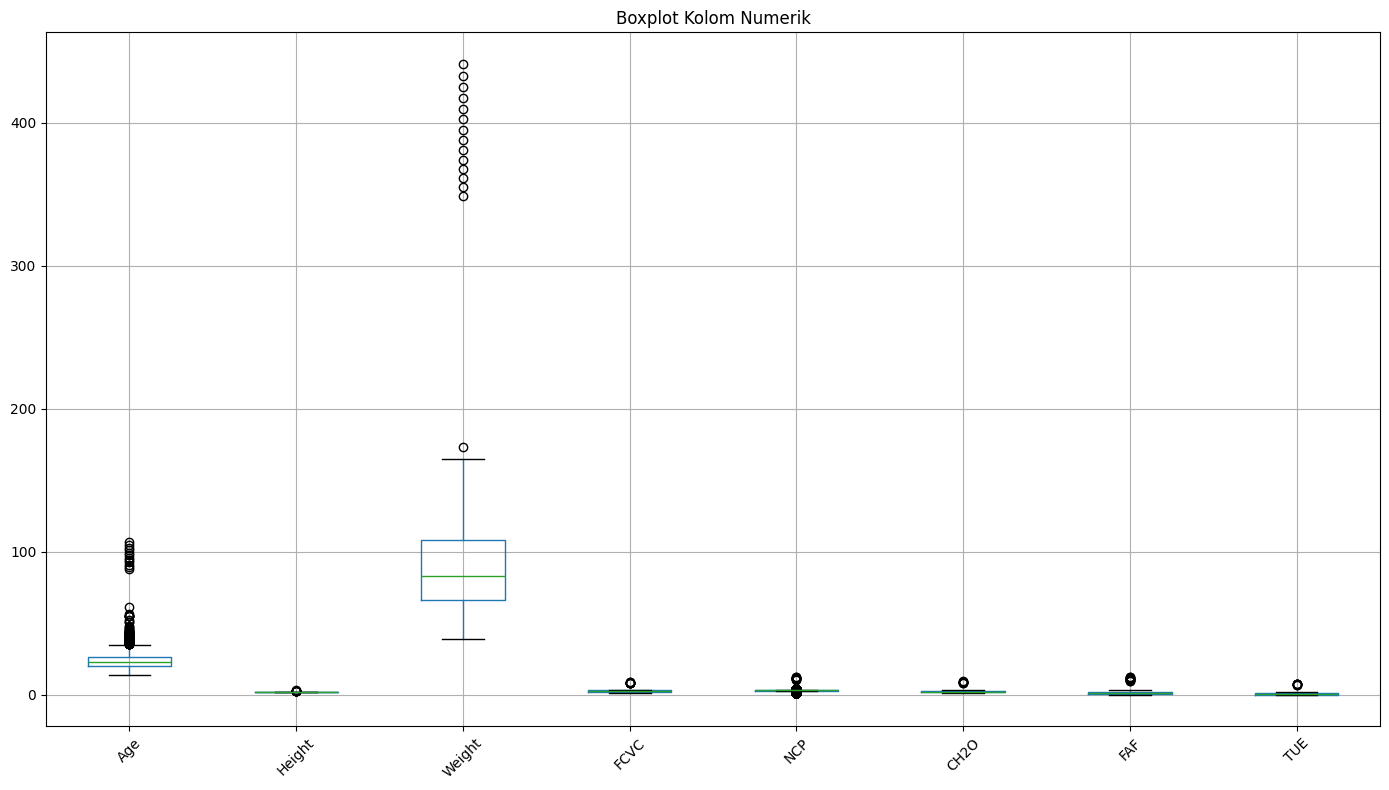

In [13]:
# Step 9: Deteksi outlier menggunakan boxplot
plt.figure(figsize=(14, 8))
df[numeric_cols].boxplot()
plt.title("Boxplot Kolom Numerik")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Kesimpulan pada tahap 1(EDA) adalah:
- Dataset terdiri dari 2111 baris dan 17 kolom.
- Banyak kolom numerik masih bertipe object awalnya, sudah dikonversi.
- Terdapat missing values dan baris duplikat yang perlu diatasi.
- Distribusi label tidak seimbang (klasifikasi multikelas).
- Beberapa kolom menunjukkan kemungkinan outlier signifikan.

Tahap 2. Preprocessing data

In [14]:
# Salin DataFrame untuk pembersihan
df_clean = df.copy()

In [15]:
# 1. Hapus duplikasi
df_clean = df_clean.drop_duplicates()

In [16]:
# 2. Tangani missing values
# a. Kolom numerik -> median
for col in numeric_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# b. Kolom kategorikal -> modus
for col in df_clean.select_dtypes(include='object').columns:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

In [17]:
# 3. Hapus outlier dengan IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_clean = remove_outliers_iqr(df_clean, numeric_cols)

# Info setelah pembersihan
missing_after = df_clean.isnull().sum()
duplicates_after = df_clean.duplicated().sum()
shape_after = df_clean.shape

missing_after, duplicates_after, shape_after

(Age                               0
 Gender                            0
 Height                            0
 Weight                            0
 CALC                              0
 FAVC                              0
 FCVC                              0
 NCP                               0
 SCC                               0
 SMOKE                             0
 CH2O                              0
 family_history_with_overweight    0
 FAF                               0
 TUE                               0
 CAEC                              0
 MTRANS                            0
 NObeyesdad                        0
 dtype: int64,
 np.int64(1),
 (1317, 17))